In [ ]:
---
title: "Lab 2 - Avocado Sales"
author: "Roee Morag"
date: "2024-10-07"
output: 
  html_document:
    theme: "cosmo" 
--- 


In [2]:
import pandas as pd
import numpy as np

In [25]:
avocado_df = pd.read_csv("C:\\Users\\morag\\OneDrive\\Documents\\MSBA\\GSB 544\\Labs\\Labs---GSB-544\\Data\\avocado-updated-2020.csv")

In [26]:
avocado_df.head(n=4)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta


1. This data set is about avocado prices in different regions/cities of the United States. Each row/observation represents a day of avocado sales in a specific city, i.e Albany, NY or Atlanta, GA. Each region/city has two observations for each date though, one showing their sales of conventional avocados and the other showing their sales of organic avocados. Each of thesscities is also a subset of a region which is a subset of the total United States column. Columns in the data set include average price of the avocados sold, the total volume of avocados sold, total bags, small bags, large bags, and extra large bags sold. The 4046, 4225, and 4770 columns are the price look up codes for smaller, medium, and large avocados and the columns refer to the amount sold on the given day.

2. As far as cleaning this data set goes, I will clean it as I go through the problems - not quite sure how to organize this until I have intiative with the problems. I will rename some columns, such as 4046, to more intuitive naming schemes. I'm also going to create dummy variables for major and metro regions. 

In [50]:
avocado_df["geography"].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester',
       'California', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth',
       'Denver', 'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles',
       'Louisville', 'Miami/Ft. Lauderdale', 'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh',
       'Plains', 'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina', 'South Central', 'Southeast',
       'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'],
      dtype=object)

In [76]:
major_regions = ["Northeast", "West", "South Central", "Southeast", "Great Lakes", "Plains", ]
metro_regions = ['Baltimore/Washington', 'Buffalo/Rochester', 'Cincinnati/Dayton', 'Dallas/Ft. Worth',
       'Harrisburg/Scranton', 'Hartford/Springfield', 'Miami/Ft. Lauderdale', 'New Orleans/Mobile',
       'Phoenix/Tucson', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'West Tex/New Mexico']

avocado_df["major_region"] = np.where(avocado_df["geography"].isin(major_regions), 1, 0)
avocado_df["metro_region"] = np.where(avocado_df["geography"].isin(metro_regions), 1, 0)


In [54]:
avocado_df.rename(columns={"4046": "small_avocados", "4225": "large_avocados", "4770": "xlarge_avocados"}, inplace=True)

3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

For this question, I will filter a data set to include only the year 2017, only organic avocado sales, and major regions. Then, I will group by region, sum along the column of small_avocados and sort by that column descending. I do not know which major geographical regions are covered in this dataset iwhtout combing through the 700ish entries but this method should give me a good idea. 

In [56]:
organic_2017 = avocado_df[(avocado_df["type"] == "organic") & (avocado_df["year"] == 2017) 
                          & (avocado_df["major_region"] == 1)]

In [57]:
small_haas_2017_sum = organic_2017.groupby("geography")["small_avocados"].sum().reset_index().sort_values(by="small_avocados", ascending=False)
small_haas_2017_sum

,geography,small_avocados
5,West,1870206.29
3,South Central,1717104.19
1,Northeast,925832.36
4,Southeast,285124.34
0,Great Lakes,202487.68
2,Plains,168583.40


I am going to assume that there are five major geographical regions (as I'm seeing in the data). They are West, South Central, Northeast, Southeast, and Midsouth. The West region sold the most total organic, small Haas avocados in 2017 with 1870206.29.

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

This is going to be a similar process to the last problem. First, we will create new variables for day and month (unnecessary for year as we already have a variable for that). Then we will filter out the data set to only include the geography of "Total US". Finally, we will group by the month and average out the total volume of avocados sold.

In [41]:
avocado_df["date"] = pd.to_datetime(avocado_df["date"])

avocado_df["month"] = avocado_df["date"].dt.month
avocado_df["day"] = avocado_df["date"].dt.day

In [42]:
total_us = avocado_df[avocado_df["geography"] == "Total U.S."]

In [46]:
total_us.groupby("month")["total_volume"].mean().reset_index().sort_values(by="total_volume", ascending=False)

,month,total_volume
4,5,2.293203e+07
1,2,2.236790e+07
5,6,2.144947e+07
3,4,2.077160e+07
2,3,2.035640e+07
0,1,2.011432e+07
6,7,2.009696e+07
7,8,1.938566e+07
8,9,1.847439e+07
9,10,1.719583e+07


The month of May sees the highest average volume of avocado sales.

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

First, I'm going to filter a data frame to one with only metro geographical regions. Then, we can group by region and sum the total volume.

In [81]:
metro_regions = avocado_df[avocado_df["metro_region"] == 1]

most_total_metro =metro_regions.groupby("geography")["total_volume"].sum().reset_index().sort_values(by="total_volume", ascending=False).head(n=5)

most_total_metro

,geography,total_volume
3,Dallas/Ft. Worth,4.362042e+08
8,Phoenix/Tucson,3.825234e+08
11,West Tex/New Mexico,2.806116e+08
0,Baltimore/Washington,2.767646e+08
6,Miami/Ft. Lauderdale,2.317448e+08


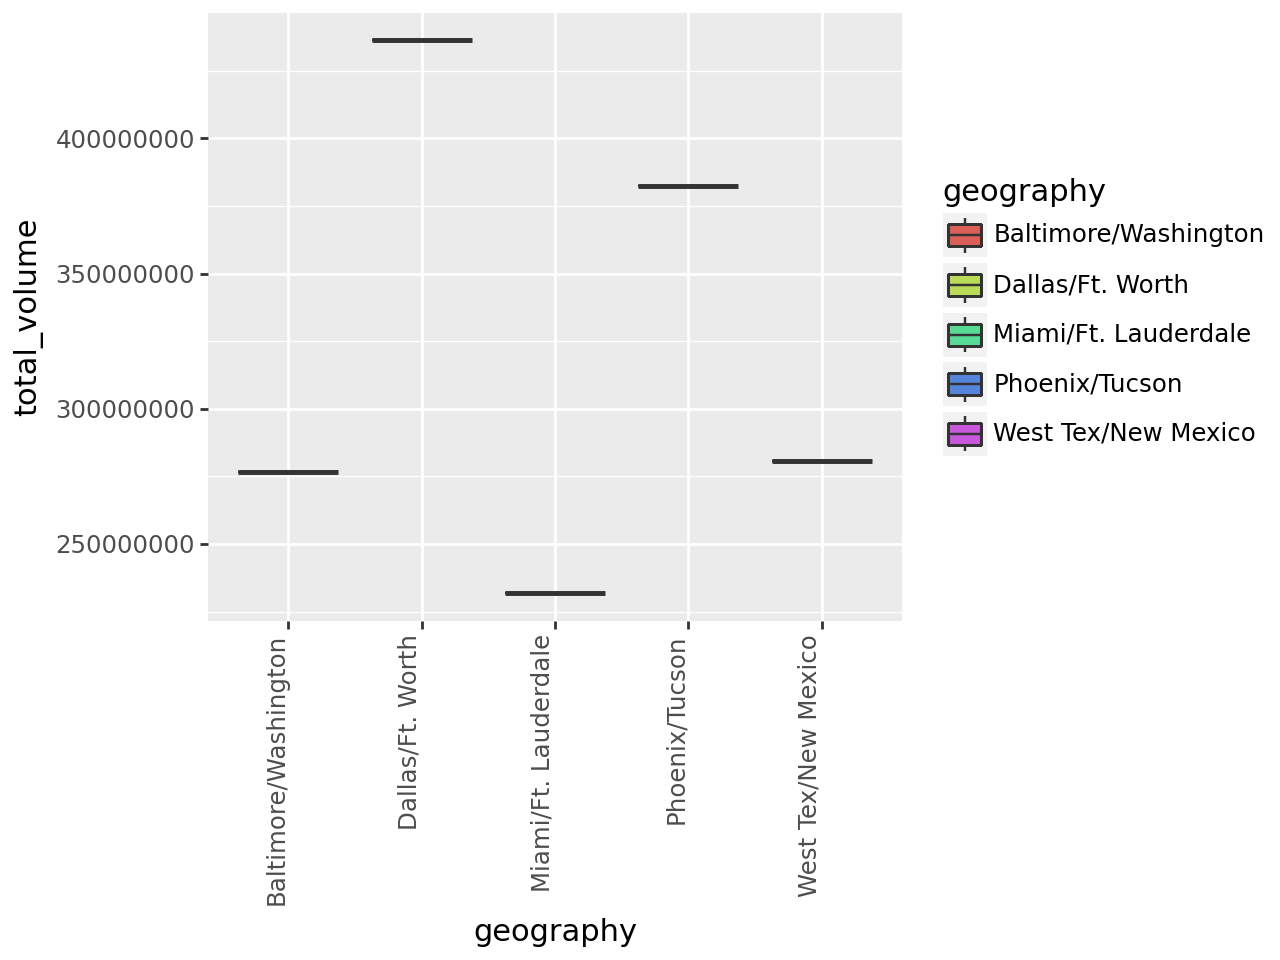

In [88]:
# The boxplot graph is not rendering correctly.

from plotnine import ggplot, aes, geom_boxplot, theme, element_text

(ggplot(most_total_metro, aes(x="geography", y="total_volume", fill="geography"))
+ geom_boxplot()
+ theme(axis_text_x=element_text(angle=90, hjust=1))
)

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [91]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]

california_df = avocado_df[avocado_df['geography'].isin(california_regions)]

7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [120]:
avg_price = california_df.groupby(["geography", "type"])["average_price"].mean().reset_index()

avg_price = avg_price.pivot(index="geography", columns="type", values="average_price").reset_index()

avg_price["price_diff"] = avg_price["organic"] - avg_price["conventional"]
avg_price

type,geography,conventional,organic,price_diff
0,Los Angeles,1.047124,1.574902,0.527778
1,Sacramento,1.295359,1.873856,0.578497
2,San Diego,1.113856,1.798366,0.684510
3,San Francisco,1.400490,2.119444,0.718954


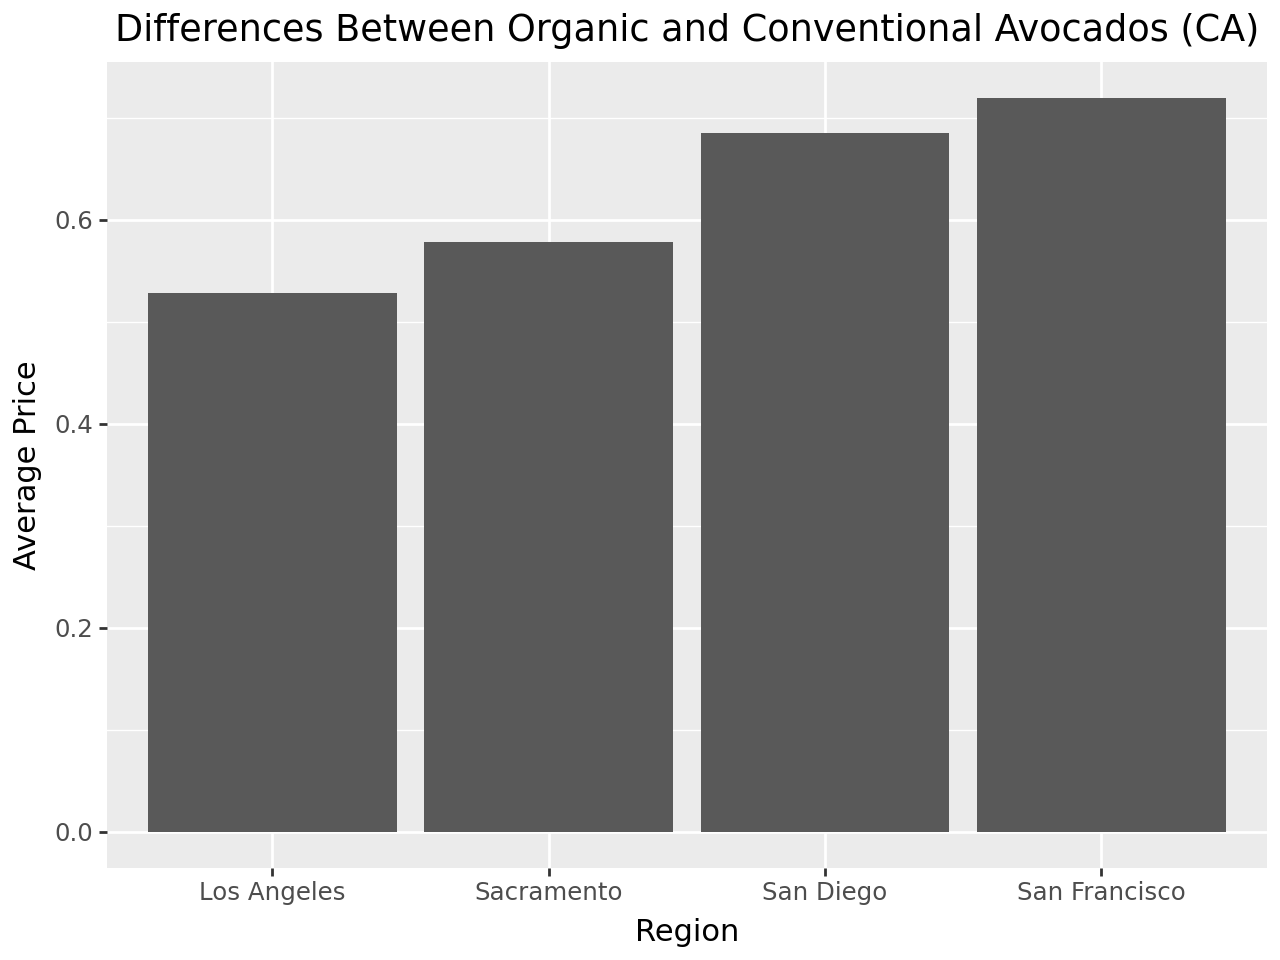

In [121]:
from plotnine import ggplot, aes, geom_bar, position_dodge, labs

(ggplot(avg_price, aes(x='geography', y='price_diff'))
    + geom_bar(stat='identity', position=position_dodge())
    + labs(title="Differences Between Organic and Conventional Avocados (CA)",
         x="Region",
         y="Average Price")
)

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [133]:
california_df["total_avocados"] = california_df["small_avocados"] + california_df["large_avocados"] + california_df["xlarge_avocados"]

california_df["small_prop"] = california_df["small_avocados"] / california_df["total_avocados"]
california_df["large_prop"] = california_df["large_avocados"] / california_df["total_avocados"]
california_df["xlarge_prop"] = california_df["xlarge_avocados"] / california_df["total_avocados"]

<positron-console-cell-133>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-133>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-133>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-133>:5: SettingWithC

In [174]:
avo_props = california_df.groupby(["type", "geography"]).agg({
    "small_prop": "mean",
    "large_prop": "mean",
    "xlarge_prop": "mean"
}).reset_index().melt(id_vars=["type", "geography"], 
                                      var_name="size", value_name="proportion")

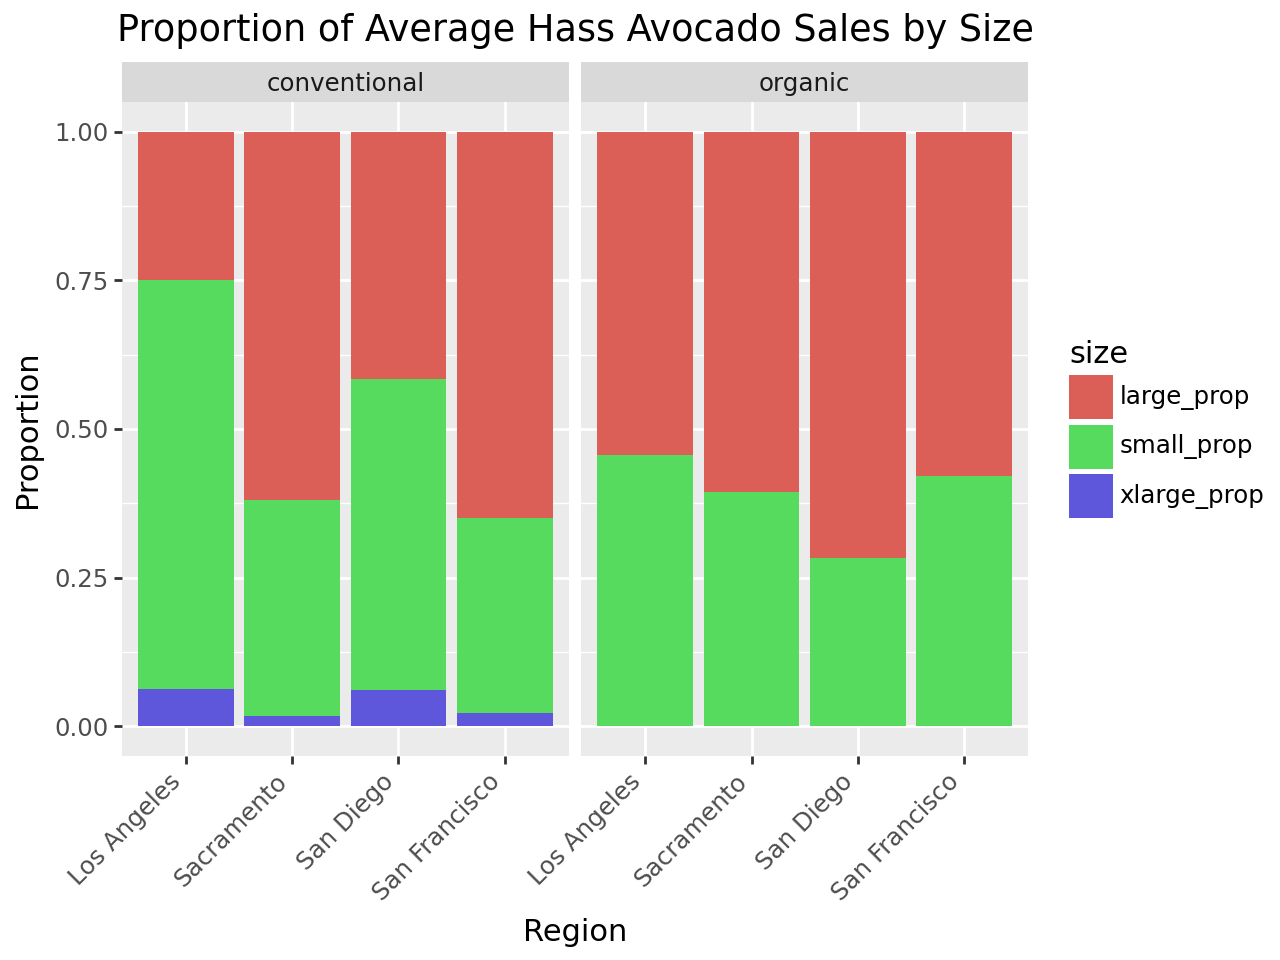

In [171]:
from plotnine import ggplot, aes, geom_bar, position_stack, labs, theme, element_text, facet_wrap, scale_fill_discrete

# ChatGPT assisted on the bar plot

(ggplot(avo_props, aes(x="geography", y="proportion", fill="size"))
    + geom_bar(stat="identity", position=position_stack())
    + labs(title="Proportion of Average Hass Avocado Sales by Size",
         x="Region",
         y="Proportion")
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + facet_wrap("~ type")
)

9. A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.